# preprocessing 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import h5py
from PIL import Image
%matplotlib inline

In [2]:
train_set = h5py.File('datasets/train_catvnoncat.h5',"r")
test_set = h5py.File('datasets/test_catvnoncat.h5',"r")

In [4]:
images_train = np.array(train_set["train_set_x"][:])
labels_train = np.array(train_set["train_set_y"][:]).reshape(1,209)
images_test = np.array(test_set["test_set_x"][:])
labels_test = np.array(test_set["test_set_y"][:]).reshape(1,50)
classes = np.array(train_set["list_classes"][:])

In [5]:
print(images_train.shape ,labels_train.shape ,images_test.shape ,labels_test.shape , )

(209, 64, 64, 3) (1, 209) (50, 64, 64, 3) (1, 50)


* we have 209 images for training and 50 images for testing 

In [6]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

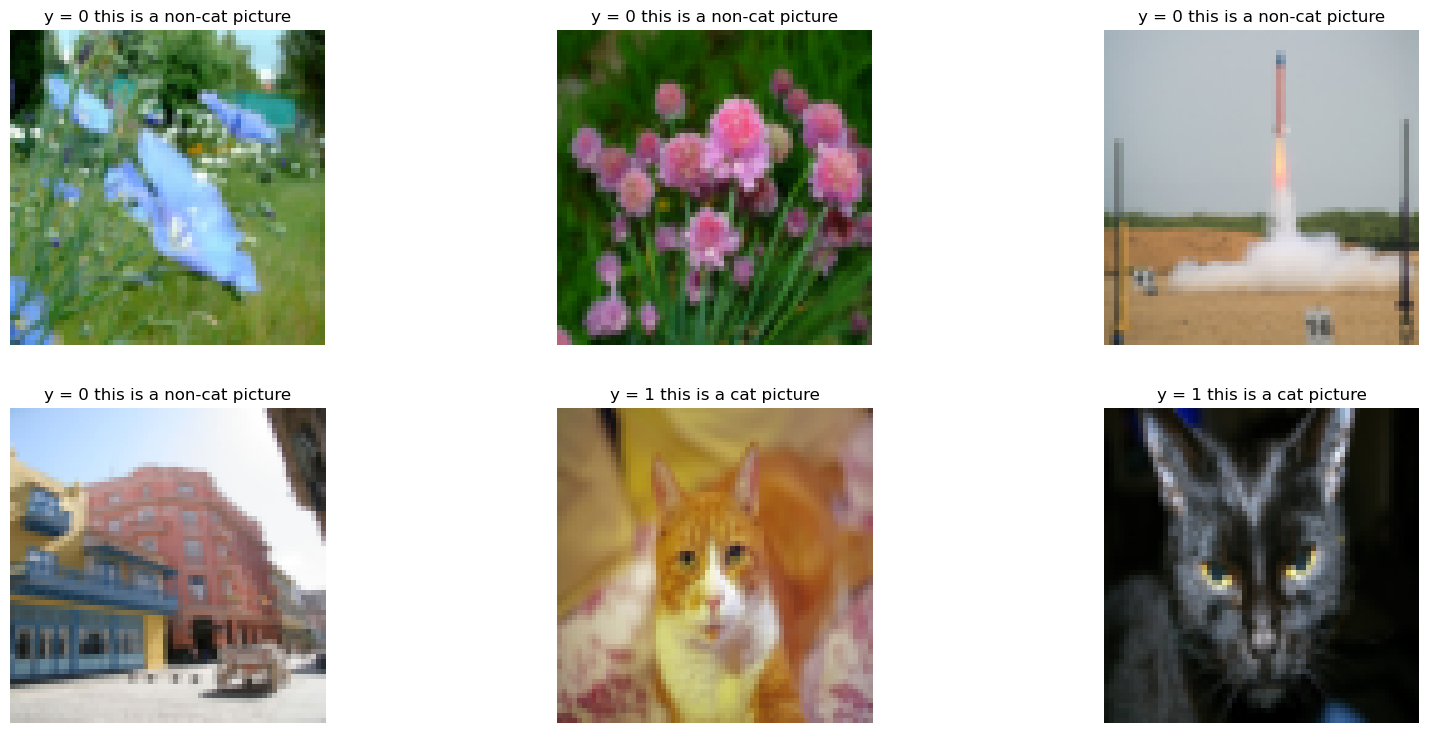

In [7]:
fig , ax = plt.subplots(2,3,figsize = (20,9),)
index =20
for i in range(2):
  for j in range(3):
    ax[i,j].imshow(images_train[index])
    ax[i,j].axis("off")
    ax[i,j].set_title('y = ' + str(labels_train[0,index]) + " this is a " + classes[labels_train[0,index]].decode()+' picture')
    index+=1

- for vectorization and simplicity sake we turn our dataset to matrix 
- in this matrix each coloumn stand for a picture 
- in every coloumn first store the matrix of red and then green and blue 



In [8]:
matrix_images_train = images_train.T.reshape(12288,209)
matrix_images_test = images_test.T.reshape(12288,50)

- normalize data for improving calculation 
- and we cast data type to float32 beacuse it is more easy for network to handle it 

In [9]:
matrix_images_train = (matrix_images_train/255).astype('float32')
matrix_images_test = (matrix_images_test/255).astype('float32')

In [10]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [11]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w ,b

In [12]:
def accuracy(w,b,X,Y):
    y_hat = np.dot(w.T,X)+b
    y_hat = sigmoid(y_hat)
    y_hat = y_hat >= 0.5
    temp = (y_hat == Y)
    acc = np.sum(temp)/Y.shape[1]
    return acc

In [13]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    z = np.dot(w.T,X)+b
    a = sigmoid(z)
    dz = a-Y

    db = (1/m) * (np.sum(dz))
    dw = (1/m)*(np.dot(X,dz.T))

    cost = np.sum(-1*(Y*np.log(a)+(1-Y)*np.log(1-a)))/m
    cost = np.squeeze(cost)
    gradp = {"dw":dw , "db":db}
    return gradp , cost

In [14]:
def optimize(x_t,y_t,w,b,X,Y,epochs,learning_rate= 0.1 , verbos=True):
    
    #x_t and y_t is testing images and labels  
    costs=[]
    accuracies = []
    accuraciest = []

    for i in range(epochs):
        grad , cost = propagate(w,b,X,Y)
        costs.append(cost)
        dw = grad["dw"]
        db = grad['db']
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        accuracy_ = accuracy(w,b,X,Y)
        accuracy_t = accuracy(w,b,x_t,y_t)
        accuracies.append(accuracy_)
        accuraciest.append(accuracy_t)


        if verbos :
          print(cost,"*"*60,"iteration: "+str(i),"cost: "+str(cost),"train_accuracy: "+str(accuracy_),"test_acciuracy: "+str(accuracy_t),"dw: "+str(db),"db: "+str(dw.T),sep='\n')
    last_grads = {"dw":dw,"db":db}
    last_param = {"w":w,"b":b}
    return last_param,last_grads   , costs , accuracies , accuraciest

In [15]:
def predict(w,b,X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    y_hat = sigmoid(np.dot(w.T,X)+b)
    y_hat = (y_hat > 0.5) * 1
    y_hat = y_hat.reshape(1,m)
    return y_hat

In [16]:
def model(x_train , y_train ,x_test  ,y_test,epochs=2000,learning_rate=0.1,verbos=True):
    dim = x_train.shape[0]
    w ,b = initialize_with_zeros(dim)
    paramsm, gradsm, costs ,accuracies,acc = optimize(x_test,y_test,w,b,x_train,y_train,epochs,learning_rate , verbos)
    w = paramsm['w']
    b = paramsm['b']
    train_y_hat = predict(w, b, x_train).reshape(1,-1)
    test_y_hat = predict(w, b, x_test).reshape(1,-1)
    train_accuracy= accuracy(w,b,x_train,y_train)
    test_accuracy = accuracy(w,b,x_test,y_test)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(train_y_hat - y_train)) * 100))
    print(train_accuracy)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(test_y_hat - y_test)) *100 ))
    print(test_accuracy)
    d = {"costs": costs,
        "Y_prediction_test": test_y_hat,
        "Y_prediction_train" :train_y_hat,
        "w" : w,
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": epochs,
        "accuracies":accuracies,
        "costs":costs,
        "acc_test":acc

       }
    return d

In [17]:
w ,b = initialize_with_zeros(12288)

In [19]:
import time
tic = time.time()
d = model(matrix_images_train,labels_train, matrix_images_test ,labels_test,epochs = 2000, learning_rate = 0.005)
toc = time.time()

0.6931471805599453
************************************************************
iteration: 0
cost: 0.6931471805599453
train_accuracy: 0.6555023923444976
test_acciuracy: 0.34
dw: 0.15550239234449761
db: [[0.04720893 0.05077399 0.05230322 ... 0.03317384 0.03249836 0.03245145]]
0.7410294268654253
************************************************************
iteration: 1
cost: 0.7410294268654253
train_accuracy: 0.3444976076555024
test_acciuracy: 0.66
dw: -0.15375670531752145
db: [[-0.08077088 -0.0790857  -0.07880394 ... -0.06312834 -0.06245161
  -0.06069947]]
0.7531536099481044
************************************************************
iteration: 2
cost: 0.7531536099481044
train_accuracy: 0.6555023923444976
test_acciuracy: 0.34
dw: 0.24134520571651252
db: [[0.08492833 0.08901773 0.09087892 ... 0.0621071  0.06102336 0.06036213]]
0.8667087723299927
************************************************************
iteration: 3
cost: 0.8667087723299927
train_accuracy: 0.3492822966507177
test_acciu

0.6973358001305185
************************************************************
iteration: 30
cost: 0.6973358001305185
train_accuracy: 0.6555023923444976
test_acciuracy: 0.34
dw: 0.244878977678692
db: [[0.09495194 0.09879768 0.10013978 ... 0.07139169 0.07003428 0.06900168]]
0.8064654140604927
************************************************************
iteration: 31
cost: 0.8064654140604927
train_accuracy: 0.5502392344497608
test_acciuracy: 0.78
dw: -0.2307166857633667
db: [[-0.1063349  -0.10525194 -0.10557348 ... -0.08171767 -0.08079373
  -0.07887845]]
0.6932717310492981
************************************************************
iteration: 32
cost: 0.6932717310492981
train_accuracy: 0.6555023923444976
test_acciuracy: 0.34
dw: 0.24376059450331072
db: [[0.09480272 0.09861566 0.09992248 ... 0.07130697 0.0699438  0.06890157]]
0.8006014048081938
************************************************************
iteration: 33
cost: 0.8006014048081938
train_accuracy: 0.5502392344497608
test_acci

0.6368540681793812
************************************************************
iteration: 64
cost: 0.6368540681793812
train_accuracy: 0.6555023923444976
test_acciuracy: 0.34
dw: 0.22602729319749346
db: [[0.09055053 0.09383723 0.09467171 ... 0.06797139 0.06656755 0.06543458]]
0.7173908539700461
************************************************************
iteration: 65
cost: 0.7173908539700461
train_accuracy: 0.6267942583732058
test_acciuracy: 0.84
dw: -0.21457992240513332
db: [[-0.09845293 -0.09753092 -0.09803958 ... -0.07663941 -0.07587071
  -0.07408064]]
0.6337100713965603
************************************************************
iteration: 66
cost: 0.6337100713965603
train_accuracy: 0.6602870813397129
test_acciuracy: 0.34
dw: 0.22492669238841054
db: [[0.0902131  0.09346822 0.09427805 ... 0.06769282 0.0662884  0.0651525 ]]
0.7127457802605058
************************************************************
iteration: 67
cost: 0.7127457802605058
train_accuracy: 0.6267942583732058
test_a

0.6488256434838884
************************************************************
iteration: 97
cost: 0.6488256434838884
train_accuracy: 0.6794258373205742
test_acciuracy: 0.84
dw: -0.19729524648259386
db: [[-0.09063934 -0.08984822 -0.09043097 ... -0.07148106 -0.07085967
  -0.06919523]]
0.5872185824130166
************************************************************
iteration: 98
cost: 0.5872185824130166
train_accuracy: 0.6650717703349283
test_acciuracy: 0.34
dw: 0.20717335322001348
db: [[0.08418259 0.08696499 0.08744055 ... 0.06276435 0.06136579 0.06021002]]
0.6448979291714894
************************************************************
iteration: 99
cost: 0.6448979291714894
train_accuracy: 0.6794258373205742
test_acciuracy: 0.84
dw: -0.19618061456436872
db: [[-0.09014061 -0.08935667 -0.08994204 ... -0.07114218 -0.07053012
  -0.06887409]]
0.5845083829787602
************************************************************
iteration: 100
cost: 0.5845083829787602
train_accuracy: 0.6650717703349

0.5434635072562471
************************************************************
iteration: 132
cost: 0.5434635072562471
train_accuracy: 0.6842105263157895
test_acciuracy: 0.34
dw: 0.18761354660392596
db: [[0.07679224 0.07913694 0.07935511 ... 0.05691756 0.05554683 0.05441022]]
0.5832142799322816
************************************************************
iteration: 133
cost: 0.5832142799322816
train_accuracy: 0.7272727272727273
test_acciuracy: 0.82
dw: -0.1766817835391205
db: [[-0.0814476  -0.08076753 -0.0813751  ... -0.06504935 -0.06459745
  -0.06309712]]
0.5410250949745194
************************************************************
iteration: 134
cost: 0.5410250949745194
train_accuracy: 0.6842105263157895
test_acciuracy: 0.34
dw: 0.18643059259529646
db: [[0.07633042 0.07865125 0.07885673 ... 0.05655788 0.05518937 0.05405487]]
0.5798542027975188
************************************************************
iteration: 135
cost: 0.5798542027975188
train_accuracy: 0.7320574162679426
tes

0.5295259452691558
************************************************************
iteration: 167
cost: 0.5295259452691558
train_accuracy: 0.7894736842105263
test_acciuracy: 0.8
dw: -0.15600352773047807
db: [[-0.07225432 -0.07164752 -0.07225052 ... -0.05829209 -0.05800253
  -0.05668331]]
0.5014332198153959
************************************************************
iteration: 168
cost: 0.5014332198153959
train_accuracy: 0.7129186602870813
test_acciuracy: 0.34
dw: 0.16560466233440765
db: [[0.06801813 0.06996141 0.06998384 ... 0.05015627 0.04883508 0.04775081]]
0.5265795336187561
************************************************************
iteration: 169
cost: 0.5265795336187561
train_accuracy: 0.7894736842105263
test_acciuracy: 0.8
dw: -0.15474243856199557
db: [[-0.07169397 -0.07109065 -0.07169289 ... -0.05787236 -0.0575924
  -0.05628465]]
0.49920425042085437
************************************************************
iteration: 170
cost: 0.49920425042085437
train_accuracy: 0.71291866028

0.46487402654896903
************************************************************
iteration: 202
cost: 0.46487402654896903
train_accuracy: 0.7320574162679426
test_acciuracy: 0.38
dw: 0.14303988236865633
db: [[0.05873686 0.06034957 0.06023752 ... 0.04309987 0.04184548 0.0408379 ]]
0.47967353335238677
************************************************************
iteration: 203
cost: 0.47967353335238677
train_accuracy: 0.8325358851674641
test_acciuracy: 0.8
dw: -0.1323271792480974
db: [[-0.06173589 -0.06117946 -0.06176373 ... -0.05030711 -0.05019177
  -0.04909292]]
0.46280811823585616
************************************************************
iteration: 204
cost: 0.46280811823585616
train_accuracy: 0.7320574162679426
test_acciuracy: 0.38
dw: 0.14164360771915963
db: [[0.05815573 0.05975027 0.05963148 ... 0.04265949 0.04140969 0.0404075 ]]
0.4770920477934156
************************************************************
iteration: 205
cost: 0.4770920477934156
train_accuracy: 0.832535885167464

0.4309909159193462
************************************************************
iteration: 236
cost: 0.4309909159193462
train_accuracy: 0.7607655502392344
test_acciuracy: 0.46
dw: 0.11796870918204047
db: [[0.04820962 0.04953058 0.04931761 ... 0.035128   0.03396253 0.03306194]]
0.4383162679652367
************************************************************
iteration: 237
cost: 0.4383162679652367
train_accuracy: 0.8421052631578947
test_acciuracy: 0.8
dw: -0.10748344147688163
db: [[-0.0506959  -0.05016589 -0.05072537 ... -0.04175982 -0.04181304
  -0.04095205]]
0.4290812051286149
************************************************************
iteration: 238
cost: 0.4290812051286149
train_accuracy: 0.7607655502392344
test_acciuracy: 0.46
dw: 0.11639401080604433
db: [[0.04754265 0.0488475  0.04862939 ... 0.03462278 0.03346331 0.03257014]]
0.4360495176910737
************************************************************
iteration: 239
cost: 0.4360495176910737
train_accuracy: 0.8421052631578947
tes

0.4024187359184867
************************************************************
iteration: 271
cost: 0.4024187359184867
train_accuracy: 0.861244019138756
test_acciuracy: 0.72
dw: -0.07912186074222263
db: [[-0.03808155 -0.03755959 -0.03808802 ... -0.03187817 -0.03210675
  -0.03151893]]
0.39825328956144096
************************************************************
iteration: 272
cost: 0.39825328956144096
train_accuracy: 0.7990430622009569
test_acciuracy: 0.54
dw: 0.08749695808717362
db: [[0.03520966 0.03625701 0.03596158 ... 0.02526186 0.02421933 0.02347544]]
0.40049386961990013
************************************************************
iteration: 273
cost: 0.40049386961990013
train_accuracy: 0.8660287081339713
test_acciuracy: 0.72
dw: -0.0773213129021483
db: [[-0.03728029 -0.03675824 -0.0372846  ... -0.03124756 -0.03148671
  -0.03091621]]
0.3965515478033284
************************************************************
iteration: 274
cost: 0.3965515478033284
train_accuracy: 0.80382775

0.3717514707501279
************************************************************
iteration: 307
cost: 0.3717514707501279
train_accuracy: 0.8947368421052632
test_acciuracy: 0.72
dw: -0.04475391466367396
db: [[-0.02277794 -0.02224568 -0.02273183 ... -0.01978424 -0.02020414
  -0.01994642]]
0.370422070107126
************************************************************
iteration: 308
cost: 0.370422070107126
train_accuracy: 0.8755980861244019
test_acciuracy: 0.62
dw: 0.052490324507208135
db: [[0.02009327 0.02090299 0.02054351 ... 0.01373106 0.01284317 0.01230861]]
0.3703310291860061
************************************************************
iteration: 309
cost: 0.3703310291860061
train_accuracy: 0.8947368421052632
test_acciuracy: 0.72
dw: -0.04277974352505152
db: [[-0.02189812 -0.02136487 -0.02184838 ... -0.01908575 -0.01951602
  -0.01927728]]
0.369091722538224
************************************************************
iteration: 310
cost: 0.369091722538224
train_accuracy: 0.8851674641148

0.3517295521557098
************************************************************
iteration: 342
cost: 0.3517295521557098
train_accuracy: 0.8851674641148325
test_acciuracy: 0.66
dw: 0.021574859907431968
db: [[0.00666359 0.0073022  0.00690505 ... 0.00347825 0.00273606 0.00239991]]
0.35132555027657986
************************************************************
iteration: 343
cost: 0.35132555027657986
train_accuracy: 0.8947368421052632
test_acciuracy: 0.68
dw: -0.012808989497717789
db: [[-0.00851379 -0.0079677  -0.00840649 ... -0.00839983 -0.00897921
  -0.0090333 ]]
0.35087352406795813
************************************************************
iteration: 344
cost: 0.35087352406795813
train_accuracy: 0.8851674641148325
test_acciuracy: 0.66
dw: 0.0201566276803393
db: [[0.00604809 0.00667895 0.00628055 ... 0.00301061 0.00227536 0.0019481 ]]
0.3504743611891729
************************************************************
iteration: 345
cost: 0.3504743611891729
train_accuracy: 0.89952153110047

0.33916616632676316
************************************************************
iteration: 376
cost: 0.33916616632676316
train_accuracy: 0.9043062200956937
test_acciuracy: 0.66
dw: 0.006383297193452684
db: [[ 0.00012598  0.00066673  0.00026128 ... -0.00142335 -0.00208745
  -0.00234136]]
0.33883496507758093
************************************************************
iteration: 377
cost: 0.33883496507758093
train_accuracy: 0.9043062200956937
test_acciuracy: 0.68
dw: 0.001127716197540301
db: [[-0.00219294 -0.00166649 -0.0020776  ... -0.00323579 -0.00387518
  -0.0040865 ]]
0.33850468319799515
************************************************************
iteration: 378
cost: 0.33850468319799515
train_accuracy: 0.9090909090909091
test_acciuracy: 0.68
dw: 0.006004058814831013
db: [[-3.17144597e-05  5.05054871e-04  9.97465241e-05 ... -1.53583385e-03
  -2.19765453e-03 -2.45076097e-03]]
0.33817562225260633
************************************************************
iteration: 379
cost: 0.33817

0.3299128987003885
************************************************************
iteration: 405
cost: 0.3299128987003885
train_accuracy: 0.9138755980861244
test_acciuracy: 0.7
dw: 0.0031312357390943656
db: [[-0.00116856 -0.00067733 -0.00107878 ... -0.00229458 -0.00293574
  -0.00319507]]
0.32960483150090286
************************************************************
iteration: 406
cost: 0.32960483150090286
train_accuracy: 0.9138755980861244
test_acciuracy: 0.7
dw: 0.00358595640663898
db: [[-0.00096235 -0.00047144 -0.00087217 ... -0.0021284  -0.00277136
  -0.00303558]]
0.32929742520271466
************************************************************
iteration: 407
cost: 0.32929742520271466
train_accuracy: 0.9186602870813397
test_acciuracy: 0.7
dw: 0.003155069035365305
db: [[-0.00114818 -0.0006596  -0.00106055 ... -0.00226988 -0.00291058
  -0.00317225]]
0.32899067631385653
************************************************************
iteration: 408
cost: 0.32899067631385653
train_accuracy: 

0.3209470194761623
************************************************************
iteration: 435
cost: 0.3209470194761623
train_accuracy: 0.9186602870813397
test_acciuracy: 0.7
dw: 0.0030884771938645855
db: [[-0.00104242 -0.00058986 -0.00098481 ... -0.00207752 -0.00270951
  -0.00299929]]
0.320657619934488
************************************************************
iteration: 436
cost: 0.320657619934488
train_accuracy: 0.9186602870813397
test_acciuracy: 0.7
dw: 0.0030962372090870814
db: [[-0.00103425 -0.00058289 -0.00097763 ... -0.00206758 -0.00269929
  -0.00299012]]
0.3203688072892441
************************************************************
iteration: 437
cost: 0.3203688072892441
train_accuracy: 0.9186602870813397
test_acciuracy: 0.7
dw: 0.0030728308916435115
db: [[-0.0010399  -0.0005898  -0.00098436 ... -0.00206851 -0.0026998
  -0.00299142]]
0.32008057946542817
************************************************************
iteration: 438
cost: 0.32008057946542817
train_accuracy: 0.91

0.31251219693132337
************************************************************
iteration: 465
cost: 0.31251219693132337
train_accuracy: 0.9234449760765551
test_acciuracy: 0.7
dw: 0.002843843102189087
db: [[-0.00101252 -0.0005951  -0.00098456 ... -0.00195728 -0.00257864
  -0.00289465]]
0.31223954432498296
************************************************************
iteration: 466
cost: 0.31223954432498296
train_accuracy: 0.9234449760765551
test_acciuracy: 0.7
dw: 0.0028360349531910147
db: [[-0.00101151 -0.0005952  -0.00098447 ... -0.00195355 -0.00257455
  -0.00289139]]
0.3119674208896637
************************************************************
iteration: 467
cost: 0.3119674208896637
train_accuracy: 0.9234449760765551
test_acciuracy: 0.7
dw: 0.002827781067935182
db: [[-0.0010107  -0.00059549 -0.0009846  ... -0.00194999 -0.00257064
  -0.00288831]]
0.3116958248526472
************************************************************
iteration: 468
cost: 0.3116958248526472
train_accuracy: 0

0.30429833338717355
************************************************************
iteration: 496
cost: 0.30429833338717355
train_accuracy: 0.9234449760765551
test_acciuracy: 0.74
dw: 0.0026047380720993895
db: [[-0.00098404 -0.00059923 -0.00098344 ... -0.00185107 -0.00246116
  -0.00280196]]
0.30404129907460975
************************************************************
iteration: 497
cost: 0.30404129907460975
train_accuracy: 0.9234449760765551
test_acciuracy: 0.74
dw: 0.002597372270858779
db: [[-0.00098312 -0.0005993  -0.00098334 ... -0.00184786 -0.00245759
  -0.00279915]]
0.303784742869772
************************************************************
iteration: 498
cost: 0.303784742869772
train_accuracy: 0.9234449760765551
test_acciuracy: 0.74
dw: 0.0025900301772455794
db: [[-0.00098219 -0.00059937 -0.00098324 ... -0.00184466 -0.00245403
  -0.00279635]]
0.3035286632500359
************************************************************
iteration: 499
cost: 0.3035286632500359
train_accuracy:

0.29703305222785376
************************************************************
iteration: 525
cost: 0.29703305222785376
train_accuracy: 0.9282296650717703
test_acciuracy: 0.74
dw: 0.002399517440692056
db: [[-0.00095719 -0.00059986 -0.00097936 ... -0.00176286 -0.00236225
  -0.00272436]]
0.2967892901244459
************************************************************
iteration: 526
cost: 0.2967892901244459
train_accuracy: 0.9282296650717703
test_acciuracy: 0.74
dw: 0.0023927391966449157
db: [[-0.00095626 -0.00059984 -0.00097918 ... -0.00175998 -0.00235901
  -0.00272182]]
0.2965459647363442
************************************************************
iteration: 527
cost: 0.2965459647363442
train_accuracy: 0.9282296650717703
test_acciuracy: 0.74
dw: 0.0023859801305046147
db: [[-0.00095534 -0.00059981 -0.000979   ... -0.00175712 -0.00235577
  -0.00271929]]
0.2963030747321941
************************************************************
iteration: 528
cost: 0.2963030747321941
train_accuracy:

0.29013653087432684
************************************************************
iteration: 554
cost: 0.29013653087432684
train_accuracy: 0.9282296650717703
test_acciuracy: 0.74
dw: 0.002210504746167737
db: [[-0.00093063 -0.0005982  -0.00097311 ... -0.00168352 -0.00227212
  -0.00265388]]
0.2899049140268518
************************************************************
iteration: 555
cost: 0.2899049140268518
train_accuracy: 0.9282296650717703
test_acciuracy: 0.74
dw: 0.0022042572673544717
db: [[-0.00092972 -0.00059811 -0.00097286 ... -0.00168092 -0.00226915
  -0.00265156]]
0.28967369758899747
************************************************************
iteration: 556
cost: 0.28967369758899747
train_accuracy: 0.9282296650717703
test_acciuracy: 0.74
dw: 0.002198027181509344
db: [[-0.00092881 -0.00059801 -0.00097261 ... -0.00167834 -0.00226619
  -0.00264925]]
0.2894428803891561
************************************************************
iteration: 557
cost: 0.2894428803891561
train_accuracy

0.28357804370494966
************************************************************
iteration: 583
cost: 0.28357804370494966
train_accuracy: 0.9330143540669856
test_acciuracy: 0.74
dw: 0.002036182699796462
db: [[-0.00090466 -0.00059482 -0.00096519 ... -0.00161168 -0.00218943
  -0.00258932]]
0.2833575807833947
************************************************************
iteration: 584
cost: 0.2833575807833947
train_accuracy: 0.9330143540669856
test_acciuracy: 0.74
dw: 0.002030416879393982
db: [[-0.00090378 -0.00059468 -0.00096489 ... -0.00160932 -0.0021867
  -0.00258719]]
0.28313748623624024
************************************************************
iteration: 585
cost: 0.28313748623624024
train_accuracy: 0.9330143540669856
test_acciuracy: 0.74
dw: 0.002024666860164531
db: [[-0.0009029  -0.00059453 -0.00096459 ... -0.00160697 -0.00218398
  -0.00258506]]
0.2829177590267178
************************************************************
iteration: 586
cost: 0.2829177590267178
train_accuracy: 

0.27712030334404986
************************************************************
iteration: 613
cost: 0.27712030334404986
train_accuracy: 0.937799043062201
test_acciuracy: 0.74
dw: 0.0018698775405717955
db: [[-0.00087861 -0.00058997 -0.00095568 ... -0.00154412 -0.00211064
  -0.00252779]]
0.276910457365329
************************************************************
iteration: 614
cost: 0.276910457365329
train_accuracy: 0.937799043062201
test_acciuracy: 0.74
dw: 0.0018645641136486243
db: [[-0.00087776 -0.00058978 -0.00095534 ... -0.00154198 -0.00210812
  -0.00252582]]
0.2767009504232288
************************************************************
iteration: 615
cost: 0.2767009504232288
train_accuracy: 0.937799043062201
test_acciuracy: 0.74
dw: 0.0018592650254861032
db: [[-0.00087691 -0.0005896  -0.000955   ... -0.00153984 -0.00210561
  -0.00252386]]
0.27649178159941107
************************************************************
iteration: 616
cost: 0.27649178159941107
train_accuracy: 0

0.27096877323826
************************************************************
iteration: 643
cost: 0.27096877323826
train_accuracy: 0.937799043062201
test_acciuracy: 0.74
dw: 0.0017165309415533168
db: [[-0.00085349 -0.00058408 -0.00094514 ... -0.0014825  -0.00203782
  -0.00247082]]
0.27076871310509026
************************************************************
iteration: 644
cost: 0.27076871310509026
train_accuracy: 0.937799043062201
test_acciuracy: 0.74
dw: 0.0017116284612904893
db: [[-0.00085267 -0.00058386 -0.00094477 ... -0.00148054 -0.00203549
  -0.00246899]]
0.27056896596239477
************************************************************
iteration: 645
cost: 0.27056896596239477
train_accuracy: 0.937799043062201
test_acciuracy: 0.74
dw: 0.0017067390207728477
db: [[-0.00085185 -0.00058365 -0.00094441 ... -0.00147859 -0.00203316
  -0.00246717]]
0.27036953099285543
************************************************************
iteration: 646
cost: 0.27036953099285543
train_accuracy: 0

0.2641477062749357
************************************************************
iteration: 678
cost: 0.2641477062749357
train_accuracy: 0.9425837320574163
test_acciuracy: 0.74
dw: 0.0015524441367603334
db: [[-0.00082543 -0.00057623 -0.00093188 ... -0.00141711 -0.00195944
  -0.0024093 ]]
0.2639581340446408
************************************************************
iteration: 679
cost: 0.2639581340446408
train_accuracy: 0.9425837320574163
test_acciuracy: 0.74
dw: 0.0015479747992676418
db: [[-0.00082465 -0.000576   -0.00093149 ... -0.00141534 -0.0019573
  -0.00240761]]
0.26376884794922273
************************************************************
iteration: 680
cost: 0.26376884794922273
train_accuracy: 0.9425837320574163
test_acciuracy: 0.74
dw: 0.0015435171646044582
db: [[-0.00082387 -0.00057576 -0.0009311  ... -0.00141357 -0.00195516
  -0.00240593]]
0.2635798472713615
************************************************************
iteration: 681
cost: 0.2635798472713615
train_accuracy:

0.2587637218398146
************************************************************
iteration: 707
cost: 0.2587637218398146
train_accuracy: 0.9521531100478469
test_acciuracy: 0.74
dw: 0.0014274575632780772
db: [[-0.0008032  -0.00056916 -0.00092033 ... -0.00136756 -0.00189922
  -0.00236182]]
0.25858216554183167
************************************************************
iteration: 708
cost: 0.25858216554183167
train_accuracy: 0.9521531100478469
test_acciuracy: 0.74
dw: 0.0014233136115229185
db: [[-0.00080246 -0.00056891 -0.00091993 ... -0.00136592 -0.00189722
  -0.00236023]]
0.2584008755925058
************************************************************
iteration: 709
cost: 0.2584008755925058
train_accuracy: 0.9521531100478469
test_acciuracy: 0.74
dw: 0.0014191803811442803
db: [[-0.00080171 -0.00056865 -0.00091952 ... -0.00136429 -0.00189521
  -0.00235865]]
0.258219851345406
************************************************************
iteration: 710
cost: 0.258219851345406
train_accuracy: 

0.25360441750215407
************************************************************
iteration: 736
cost: 0.25360441750215407
train_accuracy: 0.9521531100478469
test_acciuracy: 0.74
dw: 0.0013115216620329406
db: [[-0.00078191 -0.00056171 -0.00090841 ... -0.00132171 -0.00184281
  -0.00231712]]
0.25343033093319034
************************************************************
iteration: 737
cost: 0.25343033093319034
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.001307676057551658
db: [[-0.00078119 -0.00056145 -0.000908   ... -0.00132019 -0.00184093
  -0.00231562]]
0.2532564928528035
************************************************************
iteration: 738
cost: 0.2532564928528035
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0013038402924577834
db: [[-0.00078047 -0.00056118 -0.00090758 ... -0.00131868 -0.00183905
  -0.00231413]]
0.2530829026764552
************************************************************
iteration: 739
cost: 0.2530829026764552
train_accurac

0.248320714728591
************************************************************
iteration: 767
cost: 0.248320714728591
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0011967570033173
db: [[-0.00076015 -0.00055345 -0.00089539 ... -0.00127635 -0.0017863
  -0.00227206]]
0.24815406817309676
************************************************************
iteration: 768
cost: 0.24815406817309676
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0011932034831412422
db: [[-0.00075946 -0.00055318 -0.00089497 ... -0.00127494 -0.00178454
  -0.00227065]]
0.24798765287274085
************************************************************
iteration: 769
cost: 0.24798765287274085
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0011896589559517294
db: [[-0.00075878 -0.00055291 -0.00089455 ... -0.00127354 -0.00178278
  -0.00226924]]
0.24782146830076557
************************************************************
iteration: 770
cost: 0.24782146830076557
train_accuracy: 

0.2435799697727918
************************************************************
iteration: 796
cost: 0.2435799697727918
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0010972639441584086
db: [[-0.00074071 -0.00054556 -0.00088305 ... -0.00123696 -0.00173664
  -0.00223218]]
0.24341982191925945
************************************************************
iteration: 797
cost: 0.24341982191925945
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0010939610719964315
db: [[-0.00074006 -0.00054528 -0.00088263 ... -0.00123565 -0.00173498
  -0.00223085]]
0.24325989072281887
************************************************************
iteration: 798
cost: 0.24325989072281887
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0010906664802843515
db: [[-0.0007394  -0.00054501 -0.0008822  ... -0.00123435 -0.00173332
  -0.00222951]]
0.24310017570411685
************************************************************
iteration: 799
cost: 0.24310017570411685
train_accu

0.23810064668343636
************************************************************
iteration: 831
cost: 0.23810064668343636
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0009864417360069993
db: [[-0.00071839 -0.0005359  -0.00086806 ... -0.00119295 -0.00168042
  -0.00218668]]
0.23794780631341256
************************************************************
iteration: 832
cost: 0.23794780631341256
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.000983415310089521
db: [[-0.00071777 -0.00053562 -0.00086763 ... -0.00119174 -0.00167887
  -0.00218542]]
0.23779516669417677
************************************************************
iteration: 833
cost: 0.23779516669417677
train_accuracy: 0.9569377990430622
test_acciuracy: 0.74
dw: 0.0009803963938302138
db: [[-0.00071715 -0.00053535 -0.0008672  ... -0.00119054 -0.00167732
  -0.00218416]]
0.2376427273963684
************************************************************
iteration: 834
cost: 0.2376427273963684
train_accur

0.23360105452607474
************************************************************
iteration: 861
cost: 0.23360105452607474
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0008988334075214426
db: [[-0.0007002  -0.00052759 -0.00085519 ... -0.00115796 -0.00163518
  -0.00214973]]
0.2334540551427435
************************************************************
iteration: 862
cost: 0.2334540551427435
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0008960235328233321
db: [[-0.00069961 -0.00052731 -0.00085477 ... -0.00115684 -0.00163371
  -0.00214852]]
0.2333072441845318
************************************************************
iteration: 863
cost: 0.2333072441845318
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0008932205752301073
db: [[-0.00069902 -0.00052703 -0.00085434 ... -0.00115571 -0.00163225
  -0.00214732]]
0.23316062125958628
************************************************************
iteration: 864
cost: 0.23316062125958628
train_accura

0.22912996612381492
************************************************************
iteration: 892
cost: 0.22912996612381492
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.000814861288410868
db: [[-0.0006823  -0.00051902 -0.00084195 ... -0.00112421 -0.00159101
  -0.00211333]]
0.22898863084417084
************************************************************
iteration: 893
cost: 0.22898863084417084
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0008122573863453766
db: [[-0.00068174 -0.00051874 -0.00084153 ... -0.00112316 -0.00158963
  -0.00211218]]
0.22884747236813444
************************************************************
iteration: 894
cost: 0.22884747236813444
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0008096598470790085
db: [[-0.00068117 -0.00051846 -0.0008411  ... -0.00112211 -0.00158825
  -0.00211104]]
0.22870649033819976
************************************************************
iteration: 895
cost: 0.22870649033819976
train_acc

0.22482921122351052
************************************************************
iteration: 923
cost: 0.22482921122351052
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0007370243750844032
db: [[-0.00066525 -0.00051051 -0.00082881 ... -0.00109266 -0.00154926
  -0.00207858]]
0.2246931951707775
************************************************************
iteration: 924
cost: 0.2246931951707775
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0007346100614396085
db: [[-0.00066471 -0.00051024 -0.00082839 ... -0.00109167 -0.00154796
  -0.00207749]]
0.22455734530550936
************************************************************
iteration: 925
cost: 0.22455734530550936
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0007322016084828424
db: [[-0.00066418 -0.00050997 -0.00082797 ... -0.00109069 -0.00154665
  -0.00207639]]
0.2244216613006873
************************************************************
iteration: 926
cost: 0.2244216613006873
train_accura

0.22055753709436018
************************************************************
iteration: 955
cost: 0.22055753709436018
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0006625985574299097
db: [[-0.00064851 -0.00050184 -0.00081539 ... -0.00106219 -0.00150849
  -0.00204429]]
0.22042668130732734
************************************************************
iteration: 956
cost: 0.22042668130732734
train_accuracy: 0.9617224880382775
test_acciuracy: 0.74
dw: 0.0006603643801320194
db: [[-0.000648   -0.00050157 -0.00081498 ... -0.00106127 -0.00150725
  -0.00204325]]
0.22029598168552775
************************************************************
iteration: 957
cost: 0.22029598168552775
train_accuracy: 0.9665071770334929
test_acciuracy: 0.74
dw: 0.000658135593706218
db: [[-0.00064749 -0.0005013  -0.00081456 ... -0.00106035 -0.00150601
  -0.0020422 ]]
0.22016543792991672
************************************************************
iteration: 958
cost: 0.22016543792991672
train_acc

0.21682504883299705
************************************************************
iteration: 984
cost: 0.21682504883299705
train_accuracy: 0.9665071770334929
test_acciuracy: 0.74
dw: 0.0005999461251615656
db: [[-0.00063406 -0.00049411 -0.00080339 ... -0.00103625 -0.00147341
  -0.00201449]]
0.21669860336170146
************************************************************
iteration: 985
cost: 0.21669860336170146
train_accuracy: 0.9665071770334929
test_acciuracy: 0.74
dw: 0.0005978627707692127
db: [[-0.00063357 -0.00049384 -0.00080298 ... -0.00103538 -0.00147223
  -0.00201348]]
0.21657230570668912
************************************************************
iteration: 986
cost: 0.21657230570668912
train_accuracy: 0.9665071770334929
test_acciuracy: 0.74
dw: 0.0005957844193642132
db: [[-0.00063308 -0.00049358 -0.00080257 ... -0.00103451 -0.00147106
  -0.00201248]]
0.21644615559160435
************************************************************
iteration: 987
cost: 0.21644615559160435
train_ac

0.21309488272168534
************************************************************
iteration: 1014
cost: 0.21309488272168534
train_accuracy: 0.9712918660287081
test_acciuracy: 0.72
dw: 0.0005395709289362448
db: [[-0.00061979 -0.00048624 -0.00079116 ... -0.00101095 -0.00143886
  -0.00198483]]
0.21297275446359143
************************************************************
iteration: 1015
cost: 0.21297275446359143
train_accuracy: 0.9712918660287081
test_acciuracy: 0.72
dw: 0.000537632255677647
db: [[-0.00061932 -0.00048599 -0.00079076 ... -0.00101013 -0.00143774
  -0.00198386]]
0.21285076604323855
************************************************************
iteration: 1016
cost: 0.21285076604323855
train_accuracy: 0.9712918660287081
test_acciuracy: 0.72
dw: 0.0005356982180290354
db: [[-0.00061886 -0.00048573 -0.00079035 ... -0.00100931 -0.00143662
  -0.00198289]]
0.21272891720541517
************************************************************
iteration: 1017
cost: 0.21272891720541517
train

0.20949084620678365
************************************************************
iteration: 1044
cost: 0.20949084620678365
train_accuracy: 0.9712918660287081
test_acciuracy: 0.72
dw: 0.00048338066262193263
db: [[-0.00060618 -0.00047854 -0.00077914 ... -0.00098708 -0.00140595
  -0.00195626]]
0.20937280471212294
************************************************************
iteration: 1045
cost: 0.20937280471212294
train_accuracy: 0.9712918660287081
test_acciuracy: 0.72
dw: 0.0004815761062415568
db: [[-0.00060574 -0.00047829 -0.00077874 ... -0.00098631 -0.00140488
  -0.00195532]]
0.20925489568013023
************************************************************
iteration: 1046
cost: 0.20925489568013023
train_accuracy: 0.9712918660287081
test_acciuracy: 0.72
dw: 0.000479775849043484
db: [[-0.0006053  -0.00047804 -0.00077834 ... -0.00098553 -0.00140381
  -0.00195439]]
0.2091371188746569
************************************************************
iteration: 1047
cost: 0.2091371188746569
train_

0.20600628009263378
************************************************************
iteration: 1074
cost: 0.20600628009263378
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.0004310714265243985
db: [[-0.00059321 -0.00047102 -0.00076733 ... -0.00096452 -0.00137455
  -0.00192871]]
0.20589211214535616
************************************************************
iteration: 1075
cost: 0.20589211214535616
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.0004293913051120769
db: [[-0.00059278 -0.00047077 -0.00076694 ... -0.00096379 -0.00137353
  -0.00192781]]
0.2057780698304027
************************************************************
iteration: 1076
cost: 0.2057780698304027
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.0004277151742897487
db: [[-0.00059236 -0.00047052 -0.00076655 ... -0.00096306 -0.00137251
  -0.00192691]]
0.20566415292885534
************************************************************
iteration: 1077
cost: 0.20566415292885534
train_acc

0.20263501761771233
************************************************************
iteration: 1104
cost: 0.20263501761771233
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00038236448742870927
db: [[-0.00058083 -0.00046367 -0.00075575 ... -0.00094318 -0.00134458
  -0.0019021 ]]
0.20252452557636447
************************************************************
iteration: 1105
cost: 0.20252452557636447
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.0003807999134177784
db: [[-0.00058043 -0.00046343 -0.00075537 ... -0.00094249 -0.0013436
  -0.00190123]]
0.20241415282991676
************************************************************
iteration: 1106
cost: 0.20241415282991676
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.0003792390464920041
db: [[-0.00058003 -0.00046319 -0.00075499 ... -0.0009418  -0.00134263
  -0.00190036]]
0.20230389917506034
************************************************************
iteration: 1107
cost: 0.20230389917506034
train_a

0.19947845082177165
************************************************************
iteration: 1133
cost: 0.19947845082177165
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00033846444492540806
db: [[-0.00056941 -0.00045675 -0.00074479 ... -0.00092361 -0.00131686
  -0.00187722]]
0.19937133755982478
************************************************************
iteration: 1134
cost: 0.19937133755982478
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00033700379287899954
db: [[-0.00056902 -0.00045651 -0.00074441 ... -0.00092295 -0.00131592
  -0.00187638]]
0.1992643378920186
************************************************************
iteration: 1135
cost: 0.1992643378920186
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00033554659542949086
db: [[-0.00056864 -0.00045628 -0.00074404 ... -0.00092229 -0.00131499
  -0.00187553]]
0.1991574516287693
************************************************************
iteration: 1136
cost: 0.1991574516287693
train_ac

0.19620992275457544
************************************************************
iteration: 1164
cost: 0.19620992275457544
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.000294753776300423
db: [[-0.00055776 -0.00044955 -0.00073332 ... -0.00090375 -0.0012885
  -0.00185147]]
0.19610624473862745
************************************************************
iteration: 1165
cost: 0.19610624473862745
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00029339643267626935
db: [[-0.00055739 -0.00044932 -0.00073295 ... -0.00090313 -0.00128761
  -0.00185065]]
0.19600267464330298
************************************************************
iteration: 1166
cost: 0.19600267464330298
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00029204229496878335
db: [[-0.00055703 -0.00044909 -0.00073259 ... -0.00090251 -0.00128671
  -0.00184984]]
0.19589921229236948
************************************************************
iteration: 1167
cost: 0.19589921229236948
train_a

0.1932464416967062
************************************************************
iteration: 1193
cost: 0.1932464416967062
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00025666483080975273
db: [[-0.00054736 -0.00044301 -0.00072283 ... -0.0008861  -0.00126309
  -0.00182813]]
0.19314582329639304
************************************************************
iteration: 1194
cost: 0.19314582329639304
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00025539741425166496
db: [[-0.00054701 -0.00044279 -0.00072247 ... -0.00088551 -0.00126223
  -0.00182733]]
0.19304530786784024
************************************************************
iteration: 1195
cost: 0.19304530786784024
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00025413298900507343
db: [[-0.00054666 -0.00044256 -0.00072212 ... -0.00088491 -0.00126138
  -0.00182654]]
0.19294489524620506
************************************************************
iteration: 1196
cost: 0.19294489524620506
train_

0.19036972106610697
************************************************************
iteration: 1222
cost: 0.19036972106610697
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00022109868541764327
db: [[-0.00053742 -0.00043665 -0.00071258 ... -0.00086928 -0.0012387
  -0.00180546]]
0.19027202326535483
************************************************************
iteration: 1223
cost: 0.19027202326535483
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00021991519783282597
db: [[-0.00053709 -0.00043643 -0.00071223 ... -0.00086871 -0.00123787
  -0.00180469]]
0.1901744238042319
************************************************************
iteration: 1224
cost: 0.1901744238042319
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00021873450280890462
db: [[-0.00053675 -0.00043622 -0.00071188 ... -0.00086815 -0.00123705
  -0.00180392]]
0.19007692252833308
************************************************************
iteration: 1225
cost: 0.19007692252833308
train_a

0.18738613378187327
************************************************************
iteration: 1253
cost: 0.18738613378187327
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00018568003080443065
db: [[-0.00052728 -0.00043005 -0.00070188 ... -0.00085215 -0.00121367
  -0.00178192]]
0.18729141422732842
************************************************************
iteration: 1254
cost: 0.18729141422732842
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.0001845801248511027
db: [[-0.00052696 -0.00042984 -0.00070154 ... -0.00085161 -0.00121288
  -0.00178118]]
0.1871967883814769
************************************************************
iteration: 1255
cost: 0.1871967883814769
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00018348281498829864
db: [[-0.00052664 -0.00042963 -0.0007012  ... -0.00085107 -0.00121209
  -0.00178043]]
0.18710225610012846
************************************************************
iteration: 1256
cost: 0.18710225610012846
train_a

0.18467679292325825
************************************************************
iteration: 1282
cost: 0.18467679292325825
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00015481492145805412
db: [[-0.00051821 -0.00042407 -0.00069211 ... -0.00083687 -0.00119119
  -0.00176053]]
0.18458473350773355
************************************************************
iteration: 1283
cost: 0.18458473350773355
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00015378788976906744
db: [[-0.00051791 -0.00042387 -0.00069178 ... -0.00083635 -0.00119043
  -0.0017598 ]]
0.18449276374384102
************************************************************
iteration: 1284
cost: 0.18449276374384102
train_accuracy: 0.9712918660287081
test_acciuracy: 0.7
dw: 0.00015276328403287186
db: [[-0.0005176  -0.00042367 -0.00069145 ... -0.00083584 -0.00118967
  -0.00175908]]
0.1844008834961545
************************************************************
iteration: 1285
cost: 0.1844008834961545
train_

0.18195346690554573
************************************************************
iteration: 1312
cost: 0.18195346690554573
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 0.0001250367258237089
db: [[-0.00050925 -0.00041808 -0.00068225 ... -0.00082176 -0.00116882
  -0.00173899]]
0.18186403928189357
************************************************************
iteration: 1313
cost: 0.18186403928189357
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 0.0001240800738958842
db: [[-0.00050896 -0.00041788 -0.00068193 ... -0.00082126 -0.00116809
  -0.00173829]]
0.18177469736977306
************************************************************
iteration: 1314
cost: 0.18177469736977306
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 0.00012312568461415548
db: [[-0.00050866 -0.00041768 -0.00068161 ... -0.00082077 -0.00116736
  -0.00173758]]
0.18168544104209855
************************************************************
iteration: 1315
cost: 0.18168544104209855
train_

0.1792205034369064
************************************************************
iteration: 1343
cost: 0.1792205034369064
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 9.640952519450681e-05
db: [[-0.0005004  -0.00041208 -0.00067233 ... -0.00080684 -0.00114659
  -0.00171734]]
0.1791336749496864
************************************************************
iteration: 1344
cost: 0.1791336749496864
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 9.552063917531572e-05
db: [[-0.00050012 -0.00041189 -0.00067201 ... -0.00080637 -0.00114589
  -0.00171665]]
0.17904692835489028
************************************************************
iteration: 1345
cost: 0.17904692835489028
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 9.463385947267059e-05
db: [[-0.00049984 -0.0004117  -0.0006717  ... -0.0008059  -0.00114519
  -0.00171596]]
0.17896026353335304
************************************************************
iteration: 1346
cost: 0.17896026353335304
train_accur

0.17656637224617405
************************************************************
iteration: 1374
cost: 0.17656637224617405
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 6.981208869451083e-05
db: [[-0.00049196 -0.00040628 -0.00066266 ... -0.00079259 -0.00112523
  -0.00169626]]
0.17648202809098396
************************************************************
iteration: 1375
cost: 0.17648202809098396
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 6.898629836122915e-05
db: [[-0.00049169 -0.0004061  -0.00066235 ... -0.00079214 -0.00112455
  -0.00169559]]
0.17639776224489198
************************************************************
iteration: 1376
cost: 0.17639776224489198
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 6.81624695709584e-05
db: [[-0.00049142 -0.00040591 -0.00066204 ... -0.00079169 -0.00112388
  -0.00169492]]
0.1763135745960151
************************************************************
iteration: 1377
cost: 0.1763135745960151
train_accu

0.17398762122930028
************************************************************
iteration: 1405
cost: 0.17398762122930028
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 4.510486854749863e-05
db: [[-0.00048389 -0.00040068 -0.00065325 ... -0.00077896 -0.00110466
  -0.00167573]]
0.1739056536232238
************************************************************
iteration: 1406
cost: 0.1739056536232238
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 4.433784710195937e-05
db: [[-0.00048364 -0.0004005  -0.00065295 ... -0.00077853 -0.00110401
  -0.00167508]]
0.17382376095985394
************************************************************
iteration: 1407
cost: 0.17382376095985394
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 4.357265301222214e-05
db: [[-0.00048338 -0.00040032 -0.00065265 ... -0.0007781  -0.00110336
  -0.00167443]]
0.1737419431340124
************************************************************
iteration: 1408
cost: 0.1737419431340124
train_accur

0.17148100745828634
************************************************************
iteration: 1436
cost: 0.17148100745828634
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 2.2158526381740354e-05
db: [[-0.00047619 -0.00039526 -0.00064408 ... -0.0007659  -0.00108486
  -0.00165572]]
0.17140131508370646
************************************************************
iteration: 1437
cost: 0.17140131508370646
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 2.144626185129469e-05
db: [[-0.00047594 -0.00039509 -0.00064379 ... -0.00076549 -0.00108424
  -0.00165508]]
0.17132169448536294
************************************************************
iteration: 1438
cost: 0.17132169448536294
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 2.07357002023191e-05
db: [[-0.0004757  -0.00039492 -0.0006435  ... -0.00076508 -0.00108361
  -0.00165445]]
0.17124214556426212
************************************************************
iteration: 1439
cost: 0.17124214556426212
train_a

0.16919871251485424
************************************************************
iteration: 1465
cost: 0.16919871251485424
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 2.1803275277672197e-06
db: [[-0.00046929 -0.00039037 -0.00063573 ... -0.00075418 -0.00106699
  -0.00163745]]
0.1691210621478517
************************************************************
iteration: 1466
cost: 0.1691210621478517
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 1.5159115428534722e-06
db: [[-0.00046905 -0.0003902  -0.00063545 ... -0.00075378 -0.00106638
  -0.00163683]]
0.16904348076224462
************************************************************
iteration: 1467
cost: 0.16904348076224462
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: 8.530900891453623e-07
db: [[-0.00046882 -0.00039003 -0.00063517 ... -0.00075339 -0.00106578
  -0.00163621]]
0.1689659682643988
************************************************************
iteration: 1468
cost: 0.1689659682643988
train_acc

0.1669745203479527
************************************************************
iteration: 1494
cost: 0.1669745203479527
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -1.6453325132053662e-05
db: [[-0.00046267 -0.00038562 -0.00062759 ... -0.0007429  -0.00104972
  -0.00161959]]
0.16689883306505965
************************************************************
iteration: 1495
cost: 0.16689883306505965
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -1.70729322347763e-05
db: [[-0.00046245 -0.00038546 -0.00062732 ... -0.00074252 -0.00104913
  -0.00161898]]
0.16682321211875933
************************************************************
iteration: 1496
cost: 0.16682321211875933
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -1.7691045930737584e-05
db: [[-0.00046222 -0.0003853  -0.00062704 ... -0.00074214 -0.00104855
  -0.00161837]]
0.16674765742039865
************************************************************
iteration: 1497
cost: 0.16674765742039865
train

0.1647324028249156
************************************************************
iteration: 1524
cost: 0.1647324028249156
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -3.440535327783705e-05
db: [[-0.00045611 -0.00038087 -0.00061939 ... -0.00073167 -0.00103244
  -0.00160153]]
0.16465866773654644
************************************************************
iteration: 1525
cost: 0.16465866773654644
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -3.498159025089453e-05
db: [[-0.00045589 -0.00038072 -0.00061912 ... -0.00073131 -0.00103188
  -0.00160094]]
0.16458499639553867
************************************************************
iteration: 1526
cost: 0.16458499639553867
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -3.555643139495576e-05
db: [[-0.00045568 -0.00038056 -0.00061885 ... -0.00073094 -0.00103131
  -0.00160034]]
0.1645113887180319
************************************************************
iteration: 1527
cost: 0.1645113887180319
train_ac

0.1625477439626756
************************************************************
iteration: 1554
cost: 0.1625477439626756
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -5.1097809086842394e-05
db: [[-0.00044981 -0.00037628 -0.00061139 ... -0.00072087 -0.00101575
  -0.00158388]]
0.16247588542995967
************************************************************
iteration: 1555
cost: 0.16247588542995967
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -5.163350591461551e-05
db: [[-0.00044961 -0.00037613 -0.00061113 ... -0.00072051 -0.0010152
  -0.0015833 ]]
0.16240408819419297
************************************************************
iteration: 1556
cost: 0.16240408819419297
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -5.2167897866627764e-05
db: [[-0.0004494  -0.00037598 -0.00061087 ... -0.00072016 -0.00101466
  -0.00158271]]
0.16233235217597056
************************************************************
iteration: 1557
cost: 0.16233235217597056
train

0.16006865468282916
************************************************************
iteration: 1589
cost: 0.16006865468282916
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -6.908958166417919e-05
db: [[-0.0004428  -0.00037112 -0.00060233 ... -0.00070876 -0.00099696
  -0.00156377]]
0.15999889521668295
************************************************************
iteration: 1590
cost: 0.15999889521668295
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -6.958130379923255e-05
db: [[-0.0004426  -0.00037097 -0.00060207 ... -0.00070842 -0.00099644
  -0.0015632 ]]
0.15992919435129632
************************************************************
iteration: 1591
cost: 0.15992919435129632
train_accuracy: 0.9760765550239234
test_acciuracy: 0.7
dw: -7.007181945273118e-05
db: [[-0.00044241 -0.00037083 -0.00060182 ... -0.00070808 -0.00099591
  -0.00156264]]
0.15985955201207716
************************************************************
iteration: 1592
cost: 0.15985955201207716
trai

0.15766145941847406
************************************************************
iteration: 1624
cost: 0.15766145941847406
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -8.559932315882452e-05
db: [[-0.00043611 -0.00036615 -0.00059354 ... -0.00069715 -0.00097888
  -0.00154416]]
0.15759370744356616
************************************************************
iteration: 1625
cost: 0.15759370744356616
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -8.60503825378352e-05
db: [[-0.00043592 -0.00036601 -0.00059329 ... -0.00069683 -0.00097837
  -0.00154361]]
0.15752601153515747
************************************************************
iteration: 1626
cost: 0.15752601153515747
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -8.650032618804997e-05
db: [[-0.00043574 -0.00036587 -0.00059304 ... -0.0006965  -0.00097787
  -0.00154306]]
0.15745837162309265
************************************************************
iteration: 1627
cost: 0.15745837162309265
train

0.1557191616499727
************************************************************
iteration: 1653
cost: 0.1557191616499727
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -9.823601373178878e-05
db: [[-0.0004308  -0.00036218 -0.00058645 ... -0.0006879  -0.0009644
  -0.00152828]]
0.15565300755796357
************************************************************
iteration: 1654
cost: 0.15565300755796357
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -9.865570627786938e-05
db: [[-0.00043062 -0.00036204 -0.00058621 ... -0.00068758 -0.00096391
  -0.00152774]]
0.1555869075462952
************************************************************
iteration: 1655
cost: 0.1555869075462952
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -9.907435296019075e-05
db: [[-0.00043045 -0.00036191 -0.00058597 ... -0.00068727 -0.00096342
  -0.0015272 ]]
0.15552086154822686
************************************************************
iteration: 1656
cost: 0.15552086154822686
train_acc

0.1533712150390106
************************************************************
iteration: 1689
cost: 0.1533712150390106
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00011270236188107894
db: [[-0.00042449 -0.00035741 -0.0005779  ... -0.00067683 -0.00094704
  -0.00150901]]
0.15330696659107826
************************************************************
iteration: 1690
cost: 0.15330696659107826
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00011308583252645793
db: [[-0.00042432 -0.00035728 -0.00057767 ... -0.00067653 -0.00094657
  -0.00150848]]
0.15324276989078398
************************************************************
iteration: 1691
cost: 0.15324276989078398
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00011346833784536427
db: [[-0.00042415 -0.00035715 -0.00057744 ... -0.00067623 -0.00094609
  -0.00150795]]
0.15317862487533004
************************************************************
iteration: 1692
cost: 0.15317862487533004
tra

0.15152879259677346
************************************************************
iteration: 1718
cost: 0.15152879259677346
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.0001234388099678779
db: [[-0.00041962 -0.00035371 -0.0005712  ... -0.00066824 -0.00093351
  -0.00149382]]
0.15146601971314427
************************************************************
iteration: 1719
cost: 0.15146601971314427
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00012379513931402115
db: [[-0.00041946 -0.00035359 -0.00057098 ... -0.00066795 -0.00093305
  -0.0014933 ]]
0.15140329679786288
************************************************************
iteration: 1720
cost: 0.15140329679786288
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00012415056359117176
db: [[-0.00041929 -0.00035346 -0.00057075 ... -0.00066766 -0.00093259
  -0.00149278]]
0.15134062379108826
************************************************************
iteration: 1721
cost: 0.15134062379108826
tr

0.14960580256724984
************************************************************
iteration: 1749
cost: 0.14960580256724984
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00013407304830562116
db: [[-0.00041461 -0.00034988 -0.00056423 ... -0.00065936 -0.00091949
  -0.00147791]]
0.1495445513129741
************************************************************
iteration: 1750
cost: 0.1495445513129741
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00013440223424763826
db: [[-0.00041445 -0.00034976 -0.000564   ... -0.00065907 -0.00091904
  -0.0014774 ]]
0.1494833482168933
************************************************************
iteration: 1751
cost: 0.1494833482168933
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00013473057531272777
db: [[-0.0004143  -0.00034964 -0.00056378 ... -0.00065879 -0.0009186
  -0.00147689]]
0.14942219322212794
************************************************************
iteration: 1752
cost: 0.14942219322212794
train_

0.14778898532273332
************************************************************
iteration: 1779
cost: 0.14778898532273332
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.0001435885932953556
db: [[-0.00040995 -0.00034629 -0.00055764 ... -0.00065104 -0.00090633
  -0.00146281]]
0.14772915444092308
************************************************************
iteration: 1780
cost: 0.14772915444092308
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00014389323063230373
db: [[-0.00040979 -0.00034617 -0.00055743 ... -0.00065077 -0.00090589
  -0.00146232]]
0.14766937005027378
************************************************************
iteration: 1781
cost: 0.14766937005027378
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00014419707747548782
db: [[-0.00040964 -0.00034606 -0.00055721 ... -0.00065049 -0.00090546
  -0.00146182]]
0.14760963209659042
************************************************************
iteration: 1782
cost: 0.14760963209659042
tr

0.14572221647515377
************************************************************
iteration: 1814
cost: 0.14572221647515377
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00015379181064242652
db: [[-0.00040472 -0.00034224 -0.00055017 ... -0.00064167 -0.00089145
  -0.00144557]]
0.14566398109592207
************************************************************
iteration: 1815
cost: 0.14566398109592207
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00015406979702615046
db: [[-0.00040457 -0.00034213 -0.00054996 ... -0.0006414  -0.00089104
  -0.00144509]]
0.14560579036142812
************************************************************
iteration: 1816
cost: 0.14560579036142812
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.0001543470519075951
db: [[-0.00040443 -0.00034202 -0.00054975 ... -0.00064114 -0.00089062
  -0.0014446 ]]
0.14554764422040442
************************************************************
iteration: 1817
cost: 0.14554764422040442
tr

0.14405133080446178
************************************************************
iteration: 1843
cost: 0.14405133080446178
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00016156225524454585
db: [[-0.00040055 -0.000339   -0.00054415 ... -0.00063415 -0.00087951
  -0.00143158]]
0.14399436959862041
************************************************************
iteration: 1844
cost: 0.14399436959862041
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00016181967219142058
db: [[-0.00040041 -0.00033889 -0.00054394 ... -0.0006339  -0.0008791
  -0.0014311 ]]
0.14393745158288065
************************************************************
iteration: 1845
cost: 0.14393745158288065
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00016207640313800845
db: [[-0.00040027 -0.00033878 -0.00054374 ... -0.00063364 -0.0008787
  -0.00143062]]
0.14388057670824528
************************************************************
iteration: 1846
cost: 0.14388057670824528
tra

0.14241681376798507
************************************************************
iteration: 1872
cost: 0.14241681376798507
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00016875429468582315
db: [[-0.00039653 -0.00033585 -0.00053826 ... -0.00062686 -0.00086789
  -0.00141783]]
0.14236108545631054
************************************************************
iteration: 1873
cost: 0.14236108545631054
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00016899242140900198
db: [[-0.00039639 -0.00033574 -0.00053806 ... -0.00062661 -0.0008675
  -0.00141736]]
0.14230539894411187
************************************************************
iteration: 1874
cost: 0.14230539894411187
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.0001692299047851762
db: [[-0.00039626 -0.00033564 -0.00053786 ... -0.00062637 -0.0008671
  -0.00141689]]
0.14224975418453337
************************************************************
iteration: 1875
cost: 0.14224975418453337
trai

0.14076295889911414
************************************************************
iteration: 1902
cost: 0.14076295889911414
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00017562392965055014
db: [[-0.00039251 -0.00033269 -0.00053232 ... -0.00061954 -0.0008562
  -0.00140387]]
0.14070846447651164
************************************************************
iteration: 1903
cost: 0.14070846447651164
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.00017584336205875254
db: [[-0.00039238 -0.00033259 -0.00053212 ... -0.0006193  -0.00085582
  -0.00140341]]
0.14065401047830872
************************************************************
iteration: 1904
cost: 0.14065401047830872
train_accuracy: 0.9856459330143541
test_acciuracy: 0.7
dw: -0.0001760621924452657
db: [[-0.00039224 -0.00033248 -0.00053193 ... -0.00061906 -0.00085544
  -0.00140295]]
0.14059959685973747
************************************************************
iteration: 1905
cost: 0.14059959685973747
tra

0.13909223001685775
************************************************************
iteration: 1933
cost: 0.13909223001685775
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.0001821522842947629
db: [[-0.00038849 -0.00032952 -0.00052633 ... -0.00061219 -0.00084446
  -0.00138971]]
0.13903896823315515
************************************************************
iteration: 1934
cost: 0.13903896823315515
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.00018235365978321112
db: [[-0.00038837 -0.00032942 -0.00052614 ... -0.00061196 -0.00084409
  -0.00138926]]
0.13898574551686907
************************************************************
iteration: 1935
cost: 0.13898574551686907
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.00018255447316177807
db: [[-0.00038824 -0.00032932 -0.00052595 ... -0.00061172 -0.00084372
  -0.00138881]]
0.13893256182526462
************************************************************
iteration: 1936
cost: 0.13893256182526462
tr

0.13756334500199657
************************************************************
iteration: 1962
cost: 0.13756334500199657
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.00018776843234240048
db: [[-0.00038487 -0.00032664 -0.00052086 ... -0.00060552 -0.00083378
  -0.00137671]]
0.1375111990523031
************************************************************
iteration: 1963
cost: 0.1375111990523031
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.0001879540011983928
db: [[-0.00038474 -0.00032655 -0.00052067 ... -0.00060529 -0.00083342
  -0.00137626]]
0.1374590909560701
************************************************************
iteration: 1964
cost: 0.1374590909560701
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.0001881390428839141
db: [[-0.00038462 -0.00032645 -0.00052049 ... -0.00060506 -0.00083305
  -0.00137582]]
0.13740702067235655
************************************************************
iteration: 1965
cost: 0.13740702067235655
train_a

0.1358113762686333
************************************************************
iteration: 1996
cost: 0.1358113762686333
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.00019378888662277563
db: [[-0.00038076 -0.00032337 -0.0005146  ... -0.00059792 -0.00082161
  -0.00136174]]
0.1357604947231062
************************************************************
iteration: 1997
cost: 0.1357604947231062
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.00019395717033128553
db: [[-0.00038064 -0.00032328 -0.00051442 ... -0.0005977  -0.00082125
  -0.00136131]]
0.1357096496720891
************************************************************
iteration: 1998
cost: 0.1357096496720891
train_accuracy: 0.9904306220095693
test_acciuracy: 0.7
dw: -0.00019412496508348567
db: [[-0.00038052 -0.00032318 -0.00051424 ... -0.00059748 -0.0008209
  -0.00136087]]
0.13565884107662154
************************************************************
iteration: 1999
cost: 0.13565884107662154
train_ac

- this take 40399.118185043335 ms to run with cpu lets check out how much time this is take with gpu
- this take 24800.804615020752 ms to run with gpu
- so as you can see gpu run 40% faster

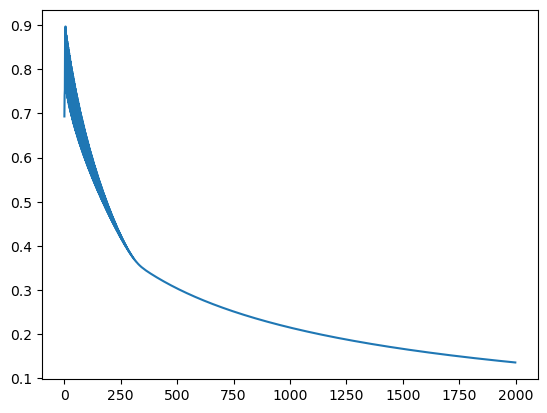

In [20]:
plt.plot(d["costs"])

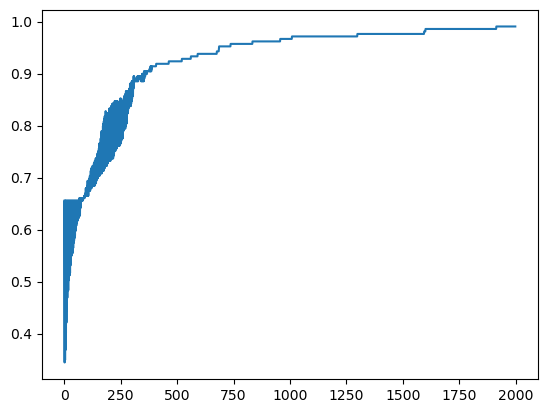

In [21]:
plt.plot(d["accuracies"])

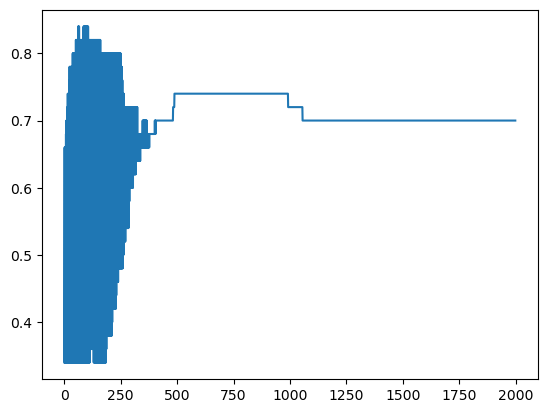

In [22]:
plt.plot(d["acc_test"])

# test model on our new data

In [23]:
def predict_prob(w,b,X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    y_hat = sigmoid(np.dot(w.T,X)+b)
    
    return y_hat

## a lion image 

In [24]:
png = Image.open("images_/lion.png")

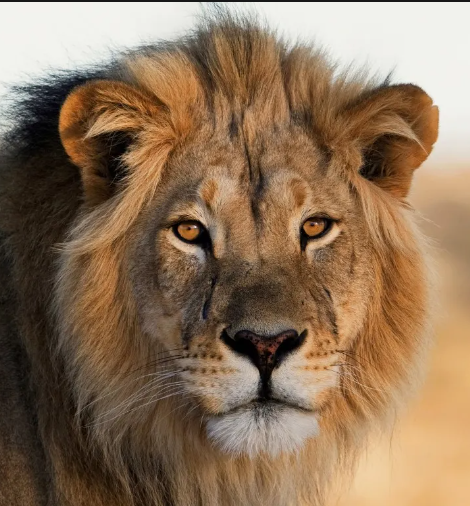

In [25]:
png

In [26]:
png.load()

In [27]:
# convert an RGBA to RGB 
background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('foo.jpg', 'JPEG', quality=80)

In [28]:
image = background.resize((64,64))

In [29]:
array = np.array(image)#.T.reshape(-1,1)

(-0.5, 63.5, 63.5, -0.5)

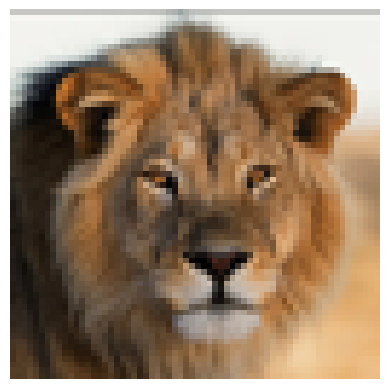

In [30]:
plt.imshow(array)
plt.axis("off")

In [31]:
input_array = np.array(array).T.reshape(1,-1,1)

In [32]:
w = d["w"] 
b = d["b"]
prediction = predict_prob(w,b,input_array[0])

In [33]:
prediction

array([[1.12153413e-162]])

In [34]:
#as you can see model can detect this isnt picture of cat 

## a lion cubs image 

In [35]:
png = Image.open("images_/lion_cubs.png")

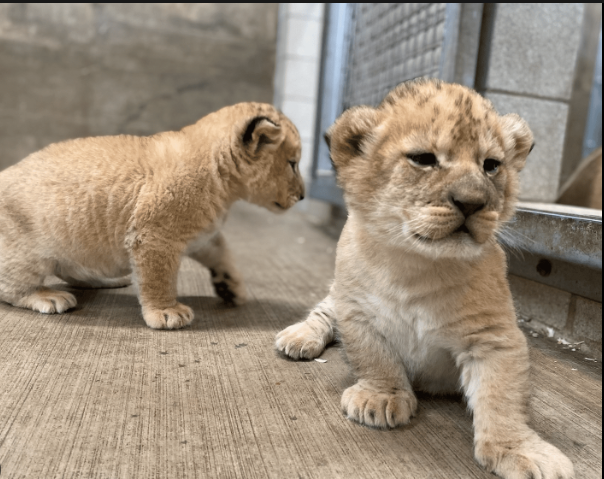

In [36]:
png

In [37]:
png.load()

In [38]:
# convert an RGBA to RGB 
background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('foo.jpg', 'JPEG', quality=80)

In [39]:
image = background.resize((64,64))

In [40]:
array = np.array(image)#.T.reshape(-1,1)

(-0.5, 63.5, 63.5, -0.5)

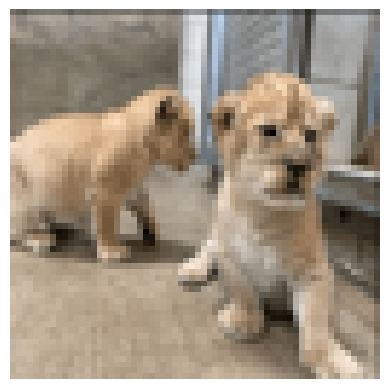

In [41]:
plt.imshow(array)
plt.axis("off")

In [42]:
input_array = np.array(array).T.reshape(1,-1,1)

In [43]:
w = d["w"] 
b = d["b"]
prediction = predict_prob(w,b,input_array[0])

In [44]:
prediction

array([[6.73452087e-61]])

In [45]:
#as you can see model can detect this isnt picture of cat 

## a real cat image

In [46]:
png = Image.open("images_/cat.png")

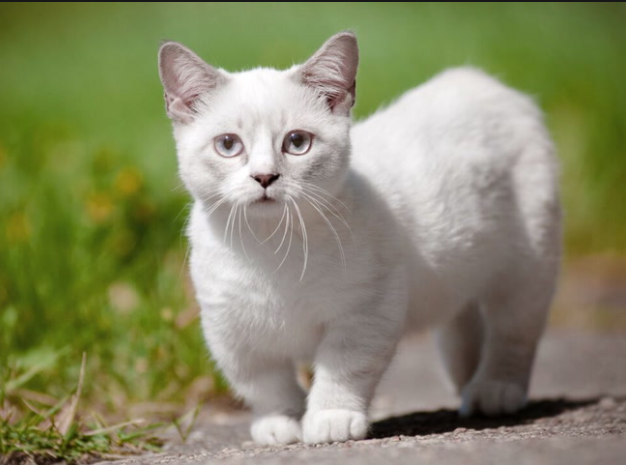

In [47]:
png

In [48]:
png.load()

In [49]:
# convert an RGBA to RGB 
background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('foo.jpg', 'JPEG', quality=80)

In [50]:
image = background.resize((64,64))

In [51]:
array = np.array(image)#.T.reshape(-1,1)

(-0.5, 63.5, 63.5, -0.5)

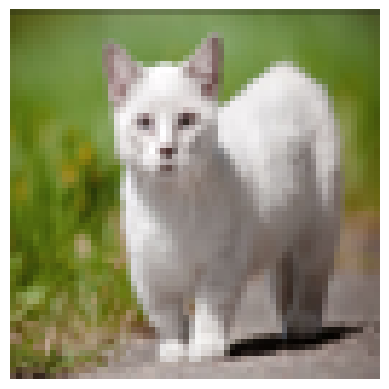

In [52]:
plt.imshow(array)
plt.axis("off")

In [53]:
input_array = np.array(array).T.reshape(1,-1,1)

In [54]:
w = d["w"] 
b = d["b"]
prediction = predict_prob(w,b,input_array[0])

In [55]:
prediction

array([[9.18396732e-124]])

In [56]:
#as you can see model can't detect this is a picture of cat 

In [57]:
predic = predict(w,b,matrix_images_test)

In [58]:
predic

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0]])

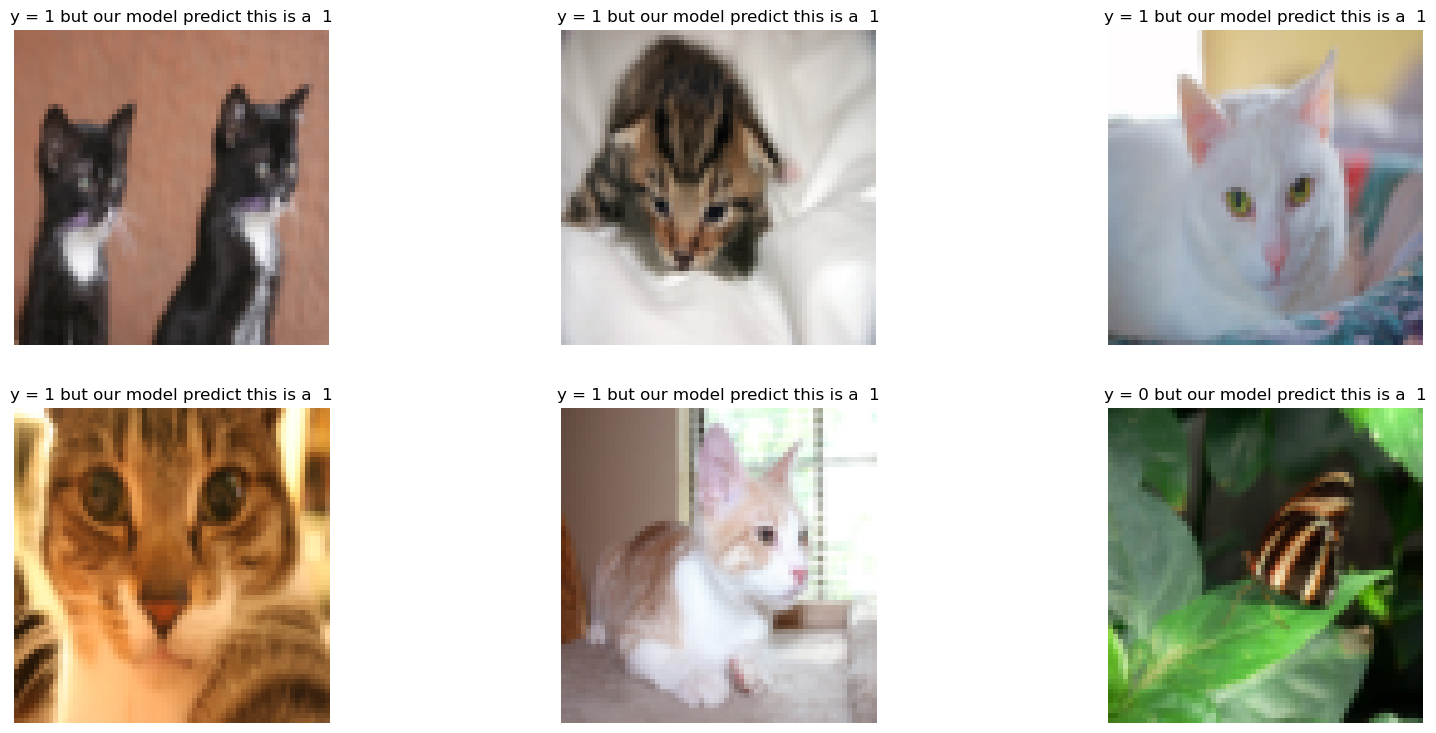

In [59]:
fig , ax = plt.subplots(2,3,figsize = (20,9),)
index =0
for i in range(2):
  for j in range(3):
    ax[i,j].imshow(images_test[index])
    ax[i,j].axis("off")
    ax[i,j].set_title('y = ' + str(labels_test[0,index]) + " but our model predict this is a  " + str(predic[0,index]))
    index+=1

## a real cat image

In [60]:
png = Image.open("images_/cat_2.png")

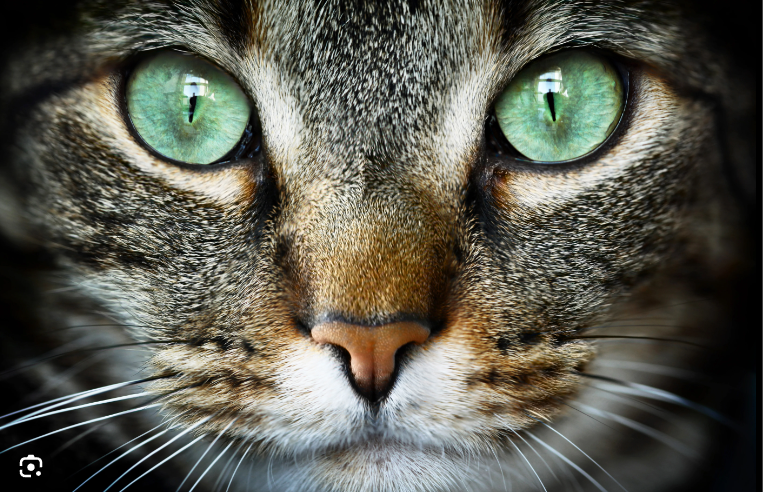

In [61]:
png

In [62]:
png.load()

In [63]:
# convert an RGBA to RGB 
background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('foo.jpg', 'JPEG', quality=80)

In [64]:
image = background.resize((64,64))

In [65]:
array = np.array(image)#.T.reshape(-1,1)

(-0.5, 63.5, 63.5, -0.5)

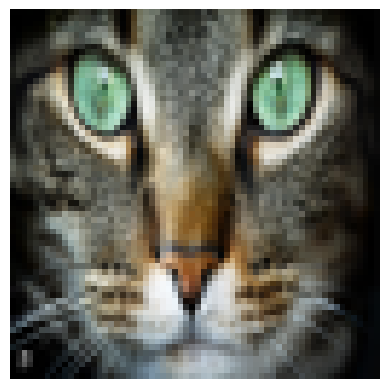

In [66]:
plt.imshow(array)
plt.axis("off")

In [67]:
input_array = np.array(array).T.reshape(1,-1,1)

In [68]:
w = d["w"] 
b = d["b"]
prediction = predict_prob(w,b,input_array[0])

In [69]:
prediction

array([[3.97245071e-21]])

In [70]:
#as you can see model can't detect this is a picture of cat 

## a real cat image

In [71]:
png = Image.open("images_/cat_5.png")

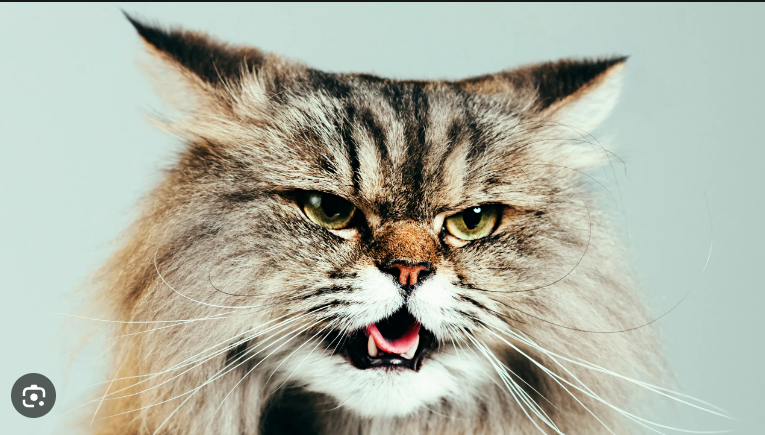

In [72]:
png

In [73]:
png.load()

In [74]:
# convert an RGBA to RGB 
background = Image.new("RGB", png.size, (255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('foo.jpg', 'JPEG', quality=80)

In [75]:
image = background.resize((64,64))

In [76]:
array = np.array(image)#.T.reshape(-1,1)

(-0.5, 63.5, 63.5, -0.5)

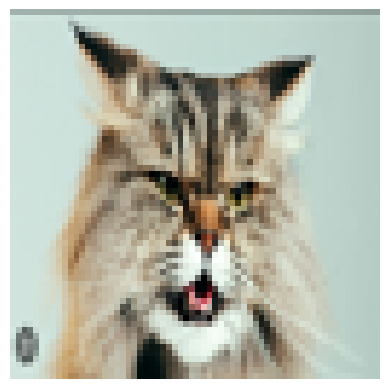

In [77]:
plt.imshow(array)
plt.axis("off")

In [78]:
input_array = np.array(array).T.reshape(1,-1,1)

In [79]:
w = d["w"] 
b = d["b"]
prediction = predict_prob(w,b,input_array[0])

In [80]:
prediction

array([[1.]])

In [81]:
#as you can see model can detect this is a picture of cat 